In [18]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
source_name='3C 279'
ra=194.046527
dec=-5.789314
radius=10.
Tstart='2003-03-15T00:00:00'
Tstop='2015-12-26T00:00:00'
host='www.astro.unige.ch/cdci/astrooda'
time_bin=10000
Nbibs=16 # number of time bin in the long-term lightcurve
E1_keV=20.
E2_keV=40.

In [3]:
token=input() # token for restricted access server
cookies=dict(_oauth2_proxy=token)

In [4]:
disp=DispatcherAPI(host=host+'/dispatch-data',instrument='mock',cookies=cookies,protocol='https')

In [5]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=1000&index_version=20190904083708'
    print(url+params)
    return requests.get(url+params,cookies=cookies).json()

In [6]:
#if token!='':
scwlist=queryxtime()
m=len(scwlist)
pointings=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        pointings.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m=int(len(pointings)/50.)
print(m)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2003-03-15T00:00:00/2015-12-26T00:00:00?&ra=194.046527&dec=-5.789314&radius=10.0&min_good_isgri=1000&index_version=20190904083708
21


In [7]:
scw_lists=[]
for i in range(m):
    count=0
    scw_string=''
    while(count<50):
        scw_string=scw_string+str(pointings[50*i+count])+','
        count+=1
    scw_lists.append(scw_string[:-1])


In [8]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=3.5,
                      product_type='Real')

007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 007700160010.001,007700170010.

In [9]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str15,float64,float64,float64,int64,int64,int64,float64
1,3C 273,14.710943222045898,187.28558349609375,2.062849283218384,-32768,2,0,0.0002800000074785203
29,IGR J12319-0749,3.997325897216797,187.99046325683594,-7.788333415985107,-32768,1,0,0.00027777778450399637
30,IGR J12391-1612,3.970698595046997,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,14.982671737670898,189.9297637939453,-5.368626594543457,-32768,2,0,0.0002800000074785203
57,NGC 5506,3.650805711746216,213.31195068359375,-3.2074999809265137,-32768,2,0,0.0002800000074785203


In [10]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:2]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [11]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row()
    data.dispatcher_catalog_1.table['src_names'][nrows]='3C 279'
    data.dispatcher_catalog_1.table['ra'][nrows]=ra
data.dispatcher_catalog_1.table['dec'][nrows]=dec
data.dispatcher_catalog_1.table['ISGRI_FLAG'][nrows]=2

data.dispatcher_catalog_1.table


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str15,float64,float64,float64,int64,int64,int64,float64
1,3C 273,14.710943222045898,187.28558349609375,2.062849283218384,-32768,2,0,0.0002800000074785203
29,IGR J12319-0749,3.997325897216797,187.99046325683594,-7.788333415985107,-32768,1,0,0.00027777778450399637
30,IGR J12391-1612,3.970698595046997,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,14.982671737670898,189.9297637939453,-5.368626594543457,-32768,2,0,0.0002800000074785203
57,NGC 5506,3.650805711746216,213.31195068359375,-3.2074999809265137,-32768,2,0,0.0002800000074785203
0,3C 279,0.0,194.046527,-5.789314,0,2,0,0.0


In [12]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [13]:
lc_results=[]
for i in range(len(scw_lists)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results.append(data)
    


0
007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 007700160010.001,00770017001



query done succesfully!
3
026700030010.001,026700040010.001,026700050010.001,026700090010.001,026700100010.001,026700110010.001,026700120010.001,026700130010.001,026700320010.001,026700390010.001,026700400010.001,026700410010.001,026700420010.001,026700430010.001,026700440010.001,026700480010.001,026700490010.001,026700500010.001,026700510010.001,026800180010.001,026800190010.001,026800200010.001,026800240010.001,026800250010.001,026800260010.001,026800270010.001,026800280010.001,026800470010.001,026800540010.001,026800550010.001,026800560010.001,026800570010.001,026800580010.001,026800590010.001,026800630010.001,026800640010.001,026800650010.001,026800660010.001,027000020010.001,027000030010.001,027000040010.001,027000050010.001,027000090010.001,027000100010.001,027000110010.001,027000120010.001,027000130010.001,027000320010.001,027000390010.001,027000400010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 02



query done succesfully!
6
032100750010.001,032100760010.001,032100770010.001,032100780010.001,032100790010.001,032100800010.001,033400470010.001,033400480010.001,033400490010.001,033400500010.001,033400510010.001,033400520010.001,033400530010.001,033400540010.001,033400550010.001,033400690010.001,033400700010.001,033400710010.001,033400720010.001,033400730010.001,033400740010.001,033400750010.001,033400760010.001,033400770010.001,033400780010.001,033400790010.001,033400800010.001,039700020010.001,039700030010.001,039700040010.001,039700050010.001,039700060010.001,039700070010.001,039700080010.001,039700090010.001,039700100010.001,039700110010.001,039700120010.001,039700130010.001,039700140010.001,039700150010.001,039700160010.001,039700170010.001,039700180010.001,039700190010.001,039700200010.001,039700210010.001,039700220010.001,039700230010.001,039700240010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 03



query done succesfully!
9
039900230010.001,039900240010.001,039900250010.001,039900260010.001,039900270010.001,039900280010.001,039900290010.001,039900300010.001,039900310010.001,039900320010.001,039900330010.001,039900340010.001,039900350010.001,039900360010.001,039900370010.001,039900380010.001,039900390010.001,039900400010.001,039900410010.001,039900420010.001,040000090010.001,040000100010.001,040000110010.001,040000120010.001,040000130010.001,040000140010.001,040000150010.001,044300070010.001,044300080010.001,044300090010.001,044300100010.001,044300110010.001,044300120010.001,044300130010.001,044300140010.001,044300150010.001,044300160010.001,044300170010.001,044300180010.001,044300190010.001,044300200010.001,044300320010.001,044300330010.001,044300340010.001,044300350010.001,044300360010.001,044300370010.001,044300390010.001,044300400010.001,044300410010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 03



query done succesfully!
12
045600630010.001,045600640010.001,063300030010.001,063300040010.001,063300050010.001,063300060010.001,063300070010.001,063300080010.001,063300090010.001,063300150010.001,063300160010.001,063300370010.001,063300380010.001,063300440010.001,063300450010.001,063300460010.001,063300470010.001,063300480010.001,063300490010.001,063300530010.001,063300540010.001,063300550010.001,063300560010.001,063300570010.001,063300580010.001,063300590010.001,063300650010.001,063300660010.001,063500020010.001,063500030010.001,063500040010.001,063500050010.001,063500060010.001,063500070010.001,063500080010.001,063500140010.001,063500150010.001,063500360010.001,063500370010.001,063500430010.001,063500440010.001,063500450010.001,063500460010.001,063500470010.001,063500480010.001,063500520010.001,063500530010.001,063500540010.001,063500550010.001,063500560010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 0



query done succesfully!
15
083000070010.001,083000080010.001,083000090010.001,083000100010.001,083000110010.001,083000120010.001,083000130010.001,083000140010.001,083000150010.001,083000160010.001,083000170010.001,083000180010.001,083000190010.001,083000200010.001,083000210010.001,083000220010.001,083000230010.001,083000240010.001,083000250010.001,083000260010.001,083000270010.001,083000280010.001,083000290010.001,083000300010.001,083000310010.001,083000320010.001,083000330010.001,083000340010.001,083000350010.001,083000360010.001,083000370010.001,083000380010.001,083000390010.001,083000400010.001,083000410010.001,083000420010.001,083000430010.001,083000440010.001,083000450010.001,083000460010.001,083000480010.001,083000490010.001,083000500010.001,083000510010.001,083000520010.001,083000530010.001,083000540010.001,083000550010.001,083000560010.001,083000570010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 0



query done succesfully!
18
100500590010.001,100600380010.001,100600460010.001,100600470010.001,100600480010.001,100600490010.001,105200840010.001,105300310010.001,105400450010.001,105400460010.001,105400470010.001,105500270010.001,105500280010.001,105500290010.001,105700190010.001,105700200010.001,105700210010.001,105700280010.001,105700290010.001,105700300010.001,105900390010.001,105900400010.001,105900410010.001,105900480010.001,105900490010.001,105900500010.001,105900510010.001,106000650010.001,106000660010.001,106000670010.001,106100480010.001,106100490010.001,106100500010.001,106300420010.001,106300430010.001,106300440010.001,106300520010.001,106700430010.001,106700440010.001,106700450010.001,106700530010.001,106800650010.001,106800660010.001,106800740010.001,106800750010.001,106800760010.001,111600480010.001,111600490010.001,111700180010.001,111700260010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 1



query done succesfully!


In [60]:
t=[]
r=[]
err=[]
tot_counts=[]
backv=[]
backe=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)
t=np.array(t)
r=np.array(r)
err=np.array(err)
tot_counts=np.array(tot_counts)
backv=np.array(backv)
backe=np.array(backe)

[ 4.267766   2.8990872 -1.2385279 ...  2.2909398  1.1074625  8.084884 ]


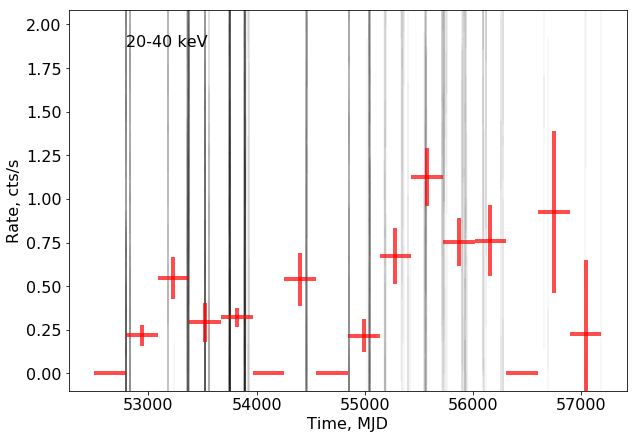

In [64]:
fig = plt.figure(figsize=(10,7))
t0=51544
Nbins=16
tmin=t0+t[0]
tmax=t0+t[-1]
time=np.linspace(tmin,tmax,Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
sc=1.

k=0
while (j<len(time)):
    while ((t[k]+t0<time[j])):
        if (err[k]>0.):
            flux[j]=flux[j]+r[k]/(err[k])**2
            error[j]=error[j]+1./(err[k])**2
        k=k+1
        if (k==len(t)):
            break
    if (k==len(t)):
        break
    else:
        j=j+1
plt.errorbar(t+t0,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='black',alpha=0.03,linewidth=2)

for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])*exp((time_av[i]-52900)/40000.)
        error[i]=1./sqrt(error[i])*exp((time_av[i]-52900)/40000.)
plt.errorbar(time_av,flux,yerr=error,xerr=dtime/2.,linestyle='none',color='red',alpha=0.7,linewidth=4)
#plt.plot(time_av,exp((time_av-52900)/40000.)/2)
plt.tick_params(axis='both', which='major', labelsize=16)
ymax=1.5*max(flux+error)
plt.ylim(-0.1,ymax)
plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
plt.text(tmin,0.9*ymax, '20-40 keV',fontsize=16)
name=source_name.replace(" ", "")
plt.savefig(name+'_lc.pdf',format='pdf',dpi=100)




In [65]:
lc_3C279=name+'_lc.pdf'